In [1]:
# utilities
import re
import numpy as np
import pandas as pd
from textblob import TextBlob
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('VacineCard_Nohas.csv')

In [3]:
def preprocess_tweets(tweet):
    
    fo = open("stopwords.txt", "r+")
    stop_words = list(fo.read().split(','))
    translation={39:None}
    processed_tweet = tweet
    processed_tweet=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in str(stop_words).translate(translation))
    return(processed_tweet)
df['Processed Tweet'] = df['tweet'].apply(lambda x: preprocess_tweets(x.lower()))

In [4]:
tweets_df = df
tweets_df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Processed Tweet
0,1442276954154045444,1442276647294550016,2021-09-26 16:56:36 Pacific Summer Time,2021-09-26,16:56:36,-700,1437118324379426819,josecru16191249,josecruz,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,vaccine card
1,1442275938746601478,1442275938746601478,2021-09-26 16:52:34 Pacific Summer Time,2021-09-26,16:52:34,-700,415669188,ilovetaguig1,I Love Taguig,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,missed second dose schedule indicated vaccinat...
2,1442275271936143361,1442175397874094081,2021-09-26 16:49:55 Pacific Summer Time,2021-09-26,16:49:55,-700,1312633873449119745,bushidoshi,Best Year Ever,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'GirlFuturist', 'name': '𝙶𝚒𝚛𝚕...",NaN,NaN,NaN,NaN,arts degree vaccine status bio bingo card sund...
3,1442275186338775045,1441897092017016832,2021-09-26 16:49:35 Pacific Summer Time,2021-09-26,16:49:35,-700,962827494876381185,puregoldj,Jay H Goldberg,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'chipfranklin', 'name': 'Chip...",NaN,NaN,NaN,NaN,exactly vaccine passport becta scare word anti...
4,1442275141791076357,1442220063461818377,2021-09-26 16:49:24 Pacific Summer Time,2021-09-26,16:49:24,-700,22237383,wordsleadmeon,Court 🐔🍷😷 (🏡549 for my 5yo nieces. 2xPfizer'd),NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'prairiecentrist', 'name': 'J...",NaN,NaN,NaN,NaN,bc wouldn even allowed patio brother law tried...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20005,1436152800610750464,1436136291717029894,2021-09-09 19:21:24 Pacific Summer Time,2021-09-09,19:21:24,-700,1066107834595778560,amoore12321_,Andrew Moore (OLED Model) #MetroidDread #Steam...,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'Chilly_MIV', 'name': 'Chilly...",NaN,NaN,NaN,NaN,miv yeah ikr lost vaccine card pain ass get ne...
20006,1436152607848939524,1436152607848939524,2021-09-09 19:20:38 Pacific Summer Time,2021-09-09,19:20:38,-700,173736223,casadormusic,casador,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,hate break buying fake vaccine card isn really...
20007,1436152082273378304,1436106615934144516,2021-09-09 19:18:33 Pacific Summer Time,2021-09-09,19:18:33,-700,40085439,tlcannady,Teresa Cannady,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'Martina', 'name': 'Martina N...",NaN,NaN,NaN,NaN,ask see vaccine card thought everyone required...
20008,1436151255743803392,1436151253701120002,2021-09-09 19:15:16 Pacific Summer Time,2021-09-09,19:15:16,-700,1368392075667005445,kerrylorkovic,Kerry Elliott Lorkovic,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,cont bring vaccine card picture identification...


In [5]:
print("Running sentiment process")
for row in tweets_df.itertuples():
    tweet = tweets_df.at[row[0], 'Processed Tweet']
#run sentiment using TextBlob
    analysis = TextBlob(tweet)
#set value to dataframe
    tweets_df.at[row[0], 'polarity'] = analysis.sentiment[0]
    tweets_df.at[row[0], 'subjectivity'] = analysis.sentiment[1]
#Create Positive / negative column depending on polarity
    if analysis.sentiment[0]>0:
        tweets_df.at[row[0], 'Sentiment'] = "Positive"
    elif analysis.sentiment[0]<0:
        tweets_df.at[row[0], 'Sentiment'] = "Negative"
    else:
        tweets_df.at[row[0], 'Sentiment'] = "Neutral"

Running sentiment process


In [6]:
tweets_df = tweets_df[['Processed Tweet','polarity','subjectivity','Sentiment']]
tweets_df1 = tweets_df[['Processed Tweet','polarity','subjectivity','Sentiment']]
tweets_df = tweets_df[tweets_df.Sentiment != 'Neutral']
tweets_df['Sentiment'] = tweets_df['Sentiment'].replace({'Negative','Positive'},{0,1})
tweets_df




,Processed Tweet,polarity,subjectivity,Sentiment
1,missed second dose schedule indicated vaccinat...,0.053333,0.213333,1
2,arts degree vaccine status bio bingo card sund...,0.250000,0.250000,1
3,exactly vaccine passport becta scare word anti...,0.250000,0.250000,1
8,nyc friends visit month want vax mandate make ...,-0.250000,0.750000,0
9,rachel bush criminal fake vaccine card fraud 3...,-0.450000,0.775000,0
...,...,...,...,...
19999,nobody mandating get vaccine keep home worried...,-0.312500,0.687500,0
20002,frustrating part retailers punya la berlagak t...,-0.400000,0.900000,0
20004,bass3 ok billy quick poke won even feel skip r...,0.383810,0.507143,1
20005,miv yeah ikr lost vaccine card pain ass get ne...,0.136364,0.454545,1


In [7]:
data = tweets_df[['Processed Tweet','Sentiment']]
data['text'] = data['Processed Tweet']
data['target'] = data['Sentiment']
data = data[['text','target']]
data

C:\Users\Zola\AppData\Local\Temp/ipykernel_3828/2879827268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['Processed Tweet']


,text,target
1,missed second dose schedule indicated vaccinat...,1
2,arts degree vaccine status bio bingo card sund...,1
3,exactly vaccine passport becta scare word anti...,1
8,nyc friends visit month want vax mandate make ...,0
9,rachel bush criminal fake vaccine card fraud 3...,0
...,...,...
19999,nobody mandating get vaccine keep home worried...,0
20002,frustrating part retailers punya la berlagak t...,0
20004,bass3 ok billy quick poke won even feel skip r...,1
20005,miv yeah ikr lost vaccine card pain ass get ne...,1


In [8]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [9]:
len(data_pos)

8123

In [10]:
dataset = pd.concat([data_pos, data_neg])

In [11]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

19996    show vaccine card keep livelihood eat restaura...
19998     standard vaccine card texas pretty states stupid
19999    nobody mandating get vaccine keep home worried...
20002    frustrating part retailers punya la berlagak t...
20006    hate break buying fake vaccine card isn really...
Name: text, dtype: object

In [12]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19996    show vaccine card keep livelihood eat restaura...
19998     standard vaccine card texas pretty states stupid
19999    nobody mandating get vaccine keep home worried...
20002    frustrating part retailers punya la berlagak t...
20006    hate break buying fake vaccine card isn really...
Name: text, dtype: object

In [13]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19996    show vaccine card keep livelihood eat restaura...
19998     standard vaccine card texas pretty states stupid
19999    nobody mandating get vaccine keep home worried...
20002    frustrating part retailers punya la berlagak t...
20006    hate break buying fake vaccine card isn really...
Name: text, dtype: object

In [14]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

1     [missed, second, dose, schedule, indicated, va...
2     [arts, degree, vaccine, status, bio, bingo, ca...
3     [exactly, vaccine, passport, becta, scare, wor...
12    [tiot, america, vaccine, passport, card, membe...
20    [kyrie, irving, goin, vaccines, plain, infuria...
Name: text, dtype: object

In [15]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

1     [missed, second, dose, schedule, indicated, va...
2     [arts, degree, vaccine, status, bio, bingo, ca...
3     [exactly, vaccine, passport, becta, scare, wor...
12    [tiot, america, vaccine, passport, card, membe...
20    [kyrie, irving, goin, vaccines, plain, infuria...
Name: text, dtype: object

In [16]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

1     [missed, second, dose, schedule, indicated, va...
2     [arts, degree, vaccine, status, bio, bingo, ca...
3     [exactly, vaccine, passport, becta, scare, wor...
12    [tiot, america, vaccine, passport, card, membe...
20    [kyrie, irving, goin, vaccines, plain, infuria...
Name: text, dtype: object

In [17]:
X=data.text
y=data.target

In [36]:
data = data[data.target == 0]
data

,text,target
8,nyc friends visit month want vax mandate make ...,0
9,rachel bush criminal fake vaccine card fraud 3...,0
13,nobody believes vaccines tracking chips ever t...,0
14,missing point hours point vaccine doesn stop s...,0
16,angry didn show vaccine card get plane,0
...,...,...
19996,show vaccine card keep livelihood eat restaura...,0
19998,standard vaccine card texas pretty states stupid,0
19999,nobody mandating get vaccine keep home worried...,0
20002,frustrating part retailers punya la berlagak t...,0


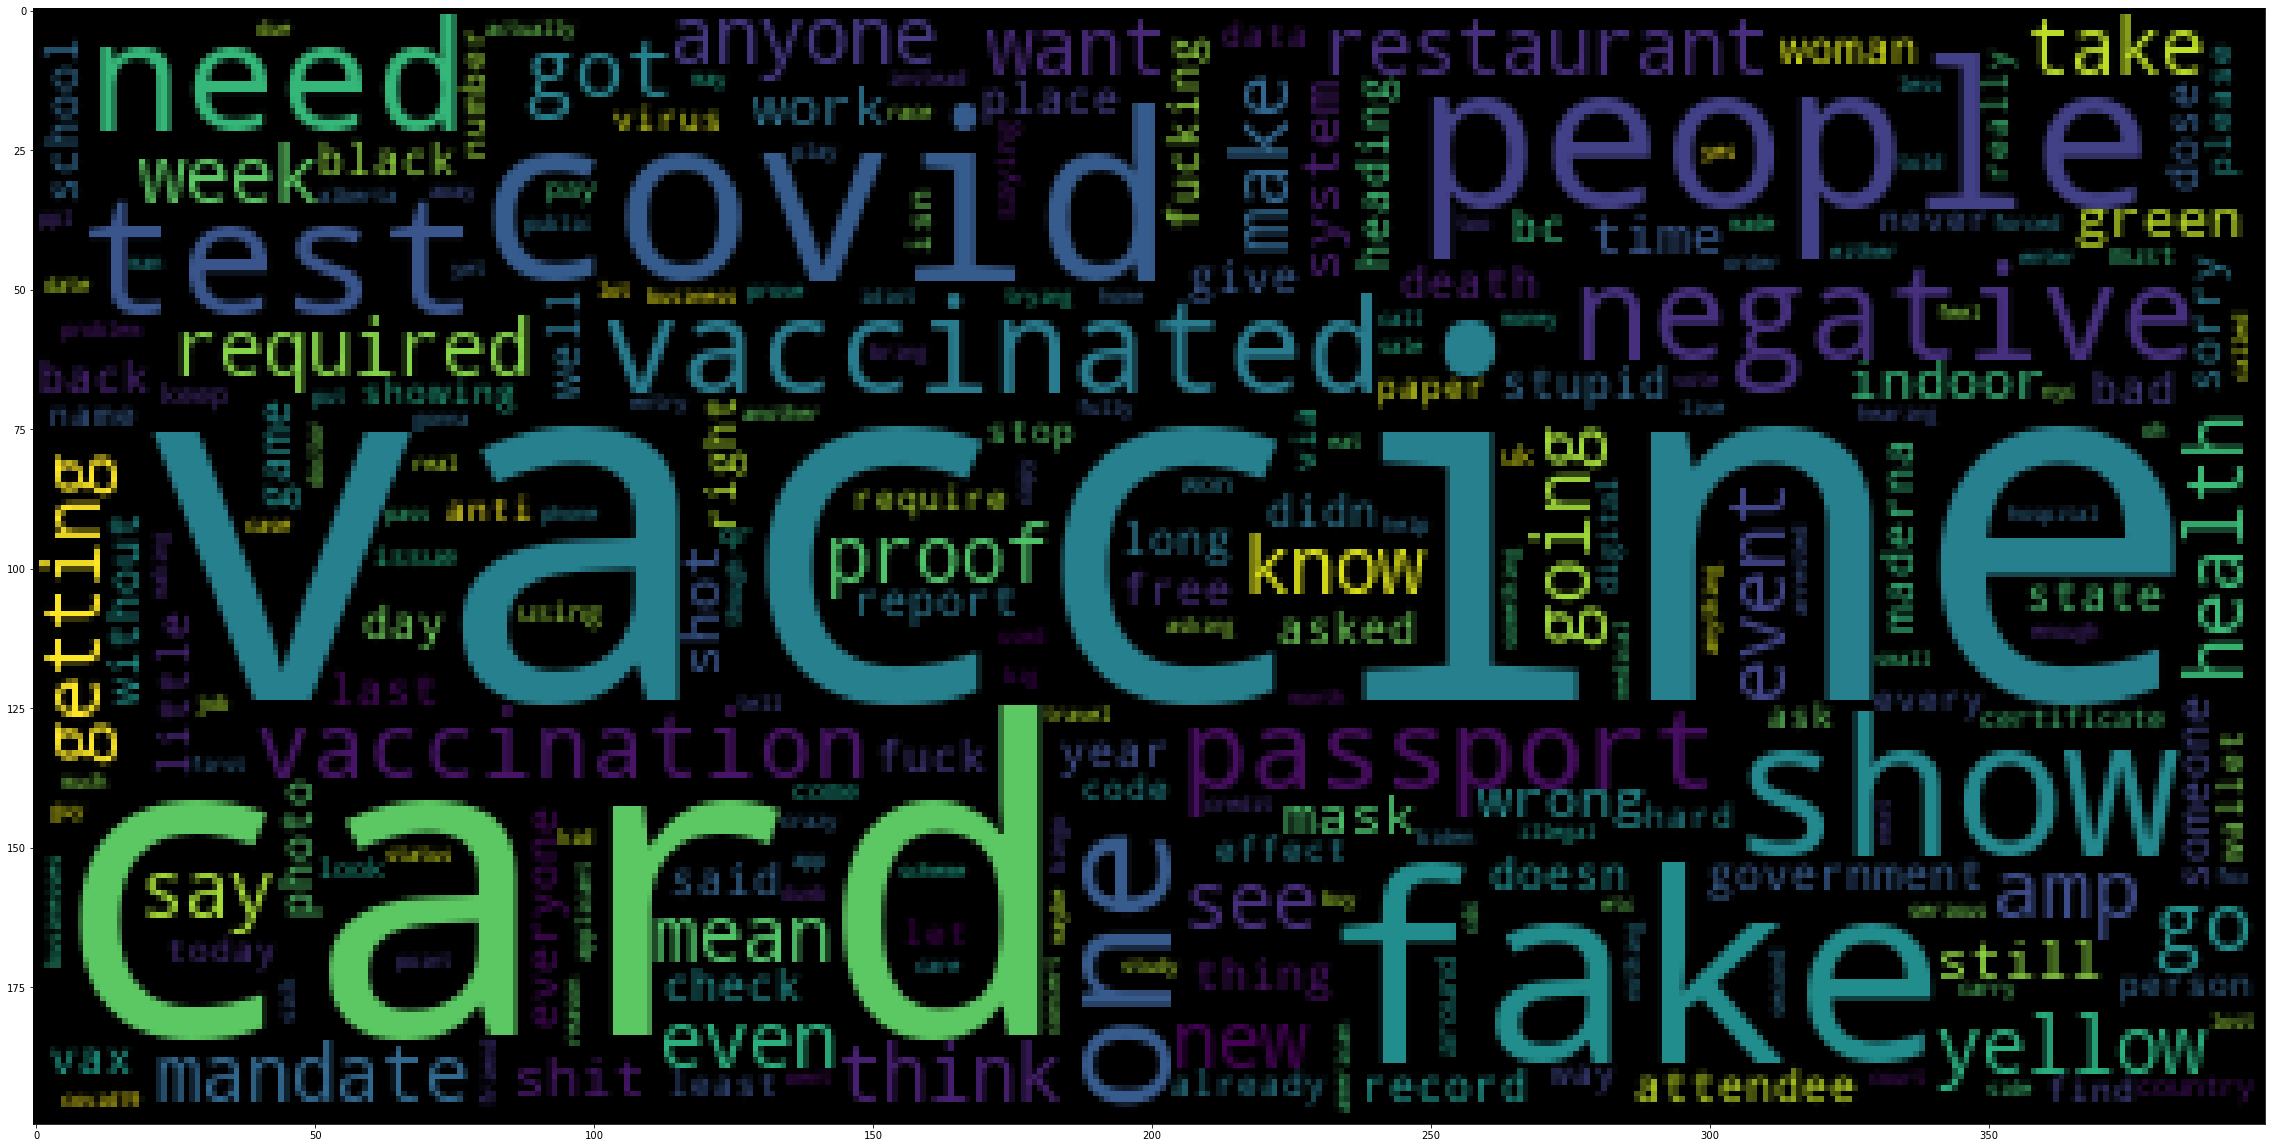

In [38]:
data_neg = data['text']
plt.figure(figsize = (40,40))
wc = WordCloud(max_words = 500, #, width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

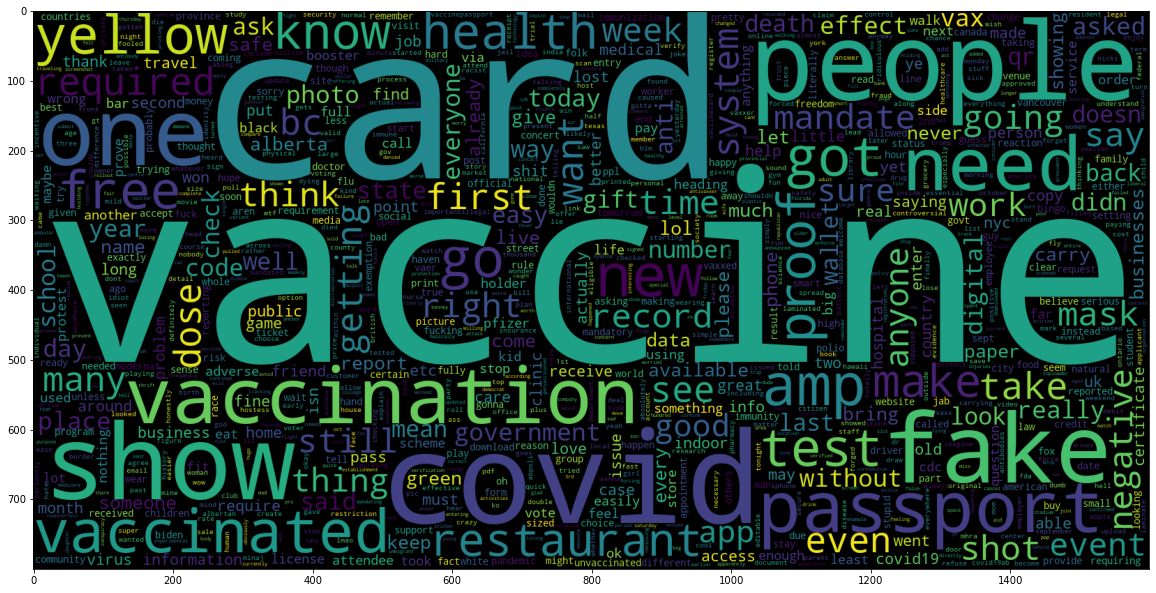

In [19]:
data_pos = data['text'][2000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [20]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=150)

In [21]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  110591


In [22]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [23]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.98      0.14      0.25      1449
           1       0.66      1.00      0.80      2427

    accuracy                           0.68      3876
   macro avg       0.82      0.57      0.52      3876
weighted avg       0.78      0.68      0.59      3876



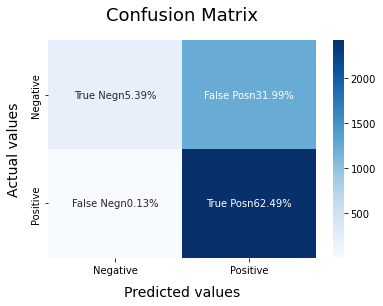

In [24]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

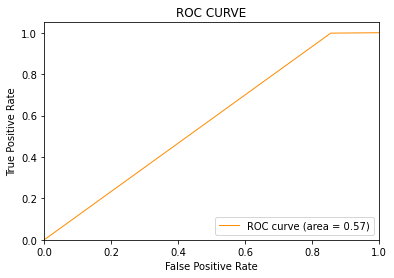

In [25]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1449
           1       0.88      0.95      0.91      2427

    accuracy                           0.89      3876
   macro avg       0.89      0.86      0.88      3876
weighted avg       0.89      0.89      0.88      3876



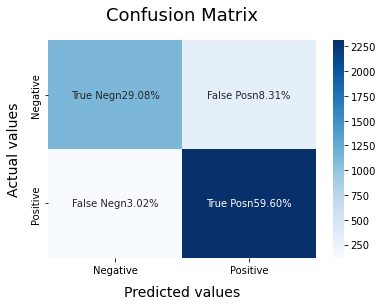

In [26]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

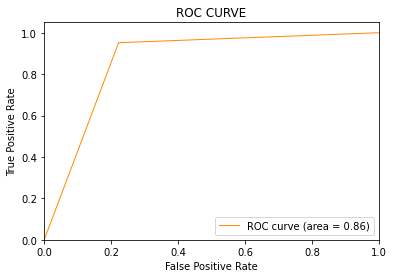

In [27]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1449
           1       0.83      0.96      0.89      2427

    accuracy                           0.85      3876
   macro avg       0.87      0.81      0.83      3876
weighted avg       0.86      0.85      0.85      3876



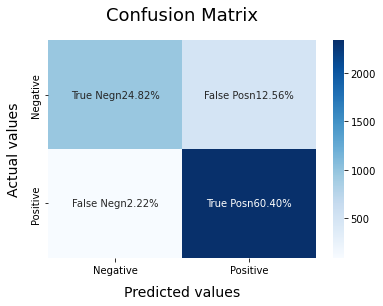

In [28]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

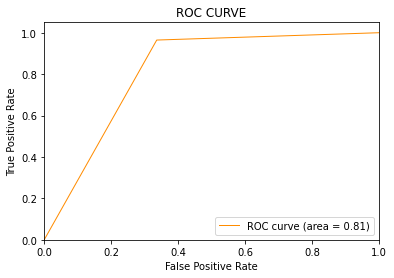

In [29]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

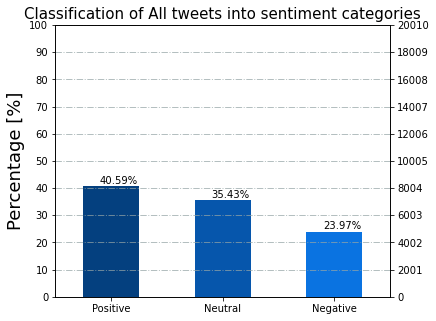

In [30]:
plt.figure(figsize=(6,5))
plt.title('Classification of All tweets into sentiment categories',fontsize=15)
plt.ylabel('Percentage [%]',fontsize=18)
ax = (tweets_df1.Sentiment.value_counts()/len(df)*100).plot(kind="bar", rot=0,color=['#04407F','#0656AC','#0A73E1'])
ax.set_yticks(np.arange(0, 110, 10))
plt.grid(color='#95a5a6', linestyle='-.', linewidth=1, axis='y', alpha=0.7)
ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))